In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import pathlib as pl
import seaborn as sns
import json
from random import choices

In [8]:
data_path = pl.Path("/home/simon/Code/semester-project-fs22/ray_tuner/Thu Oct 20 18_25_03 2022")

In [9]:
'''plt.yscale("log")
plt.plot(adam_convergence["regularization_penalty"], label="regularization", color="red")
plt.scatter(metadata["epochs"], lbfgs_loss["regularization_penalty"], marker="+", color="red")
plt.plot(adam_convergence["reconstruction_mse"],label="reconstruction_mse", color="blue")
plt.scatter(metadata["epochs"], lbfgs_loss["reconstruction_mse"], marker="+", color="blue")
plt.plot(adam_convergence["loss"], label="loss", color="green")
plt.scatter(metadata["epochs"], lbfgs_loss["loss"], marker="+", color="green")
plt.legend()
plt.title(f"WAV: {metadata['wavelet']}; MEAS: {metadata['measurement']}; EPOCHS: {metadata['epochs']}")
plt.savefig(f"WAV_{metadata['wavelet']}_MEAS_{metadata['measurement']}_EPOCHS: {metadata['epochs']}.png", dpi=300)
'''

'plt.yscale("log")\nplt.plot(adam_convergence["regularization_penalty"], label="regularization", color="red")\nplt.scatter(metadata["epochs"], lbfgs_loss["regularization_penalty"], marker="+", color="red")\nplt.plot(adam_convergence["reconstruction_mse"],label="reconstruction_mse", color="blue")\nplt.scatter(metadata["epochs"], lbfgs_loss["reconstruction_mse"], marker="+", color="blue")\nplt.plot(adam_convergence["loss"], label="loss", color="green")\nplt.scatter(metadata["epochs"], lbfgs_loss["loss"], marker="+", color="green")\nplt.legend()\nplt.title(f"WAV: {metadata[\'wavelet\']}; MEAS: {metadata[\'measurement\']}; EPOCHS: {metadata[\'epochs\']}")\nplt.savefig(f"WAV_{metadata[\'wavelet\']}_MEAS_{metadata[\'measurement\']}_EPOCHS: {metadata[\'epochs\']}.png", dpi=300)\n'

In [10]:
def get_params(path):
	with open(path) as para:
		par = json.load(para)
		return (par["wav"][0],par["levels"])

In [45]:
params = pl.Path("params.json")
progress = pl.Path("progress.csv")
runs = []
indexes = set()
for path in filter( lambda x: x.is_dir(), data_path.iterdir()):
	par = get_params(path/params)
	prog = pd.read_csv(path/progress)
	if prog.index.max() < 100 or par[0] == "bior6.8" or par[0] not in {"db2", "db10", "dmey", "coif5", "coif5", "db20"}:
		indexes.add(prog.index.max())
		continue
	prog["levels"] = par[1]
	prog["starting_wav"] = par[0]
	prog["epoch"] = prog.index
	runs.append(prog[["total_loss", "reconstruction_mse", "l0_pnorm", "regularization_penalty", "train_loss", "levels", "starting_wav", "epoch", "val_orth_loss", "train_l0_avg"]])
print(indexes)
chosen = []
runs.sort(key = lambda frame: frame["epoch"].max(), reverse = True)
superframe = pd.concat(runs[:6] + runs[-6:], ignore_index=True)
superframe.to_csv("combined-tuneresults.csv")
superframe.to_latex("combined-tuneresults.tex")

{104, 209, 349}


/tmp/ipykernel_4447/624753633.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  superframe.to_latex("combined-tuneresults.tex")


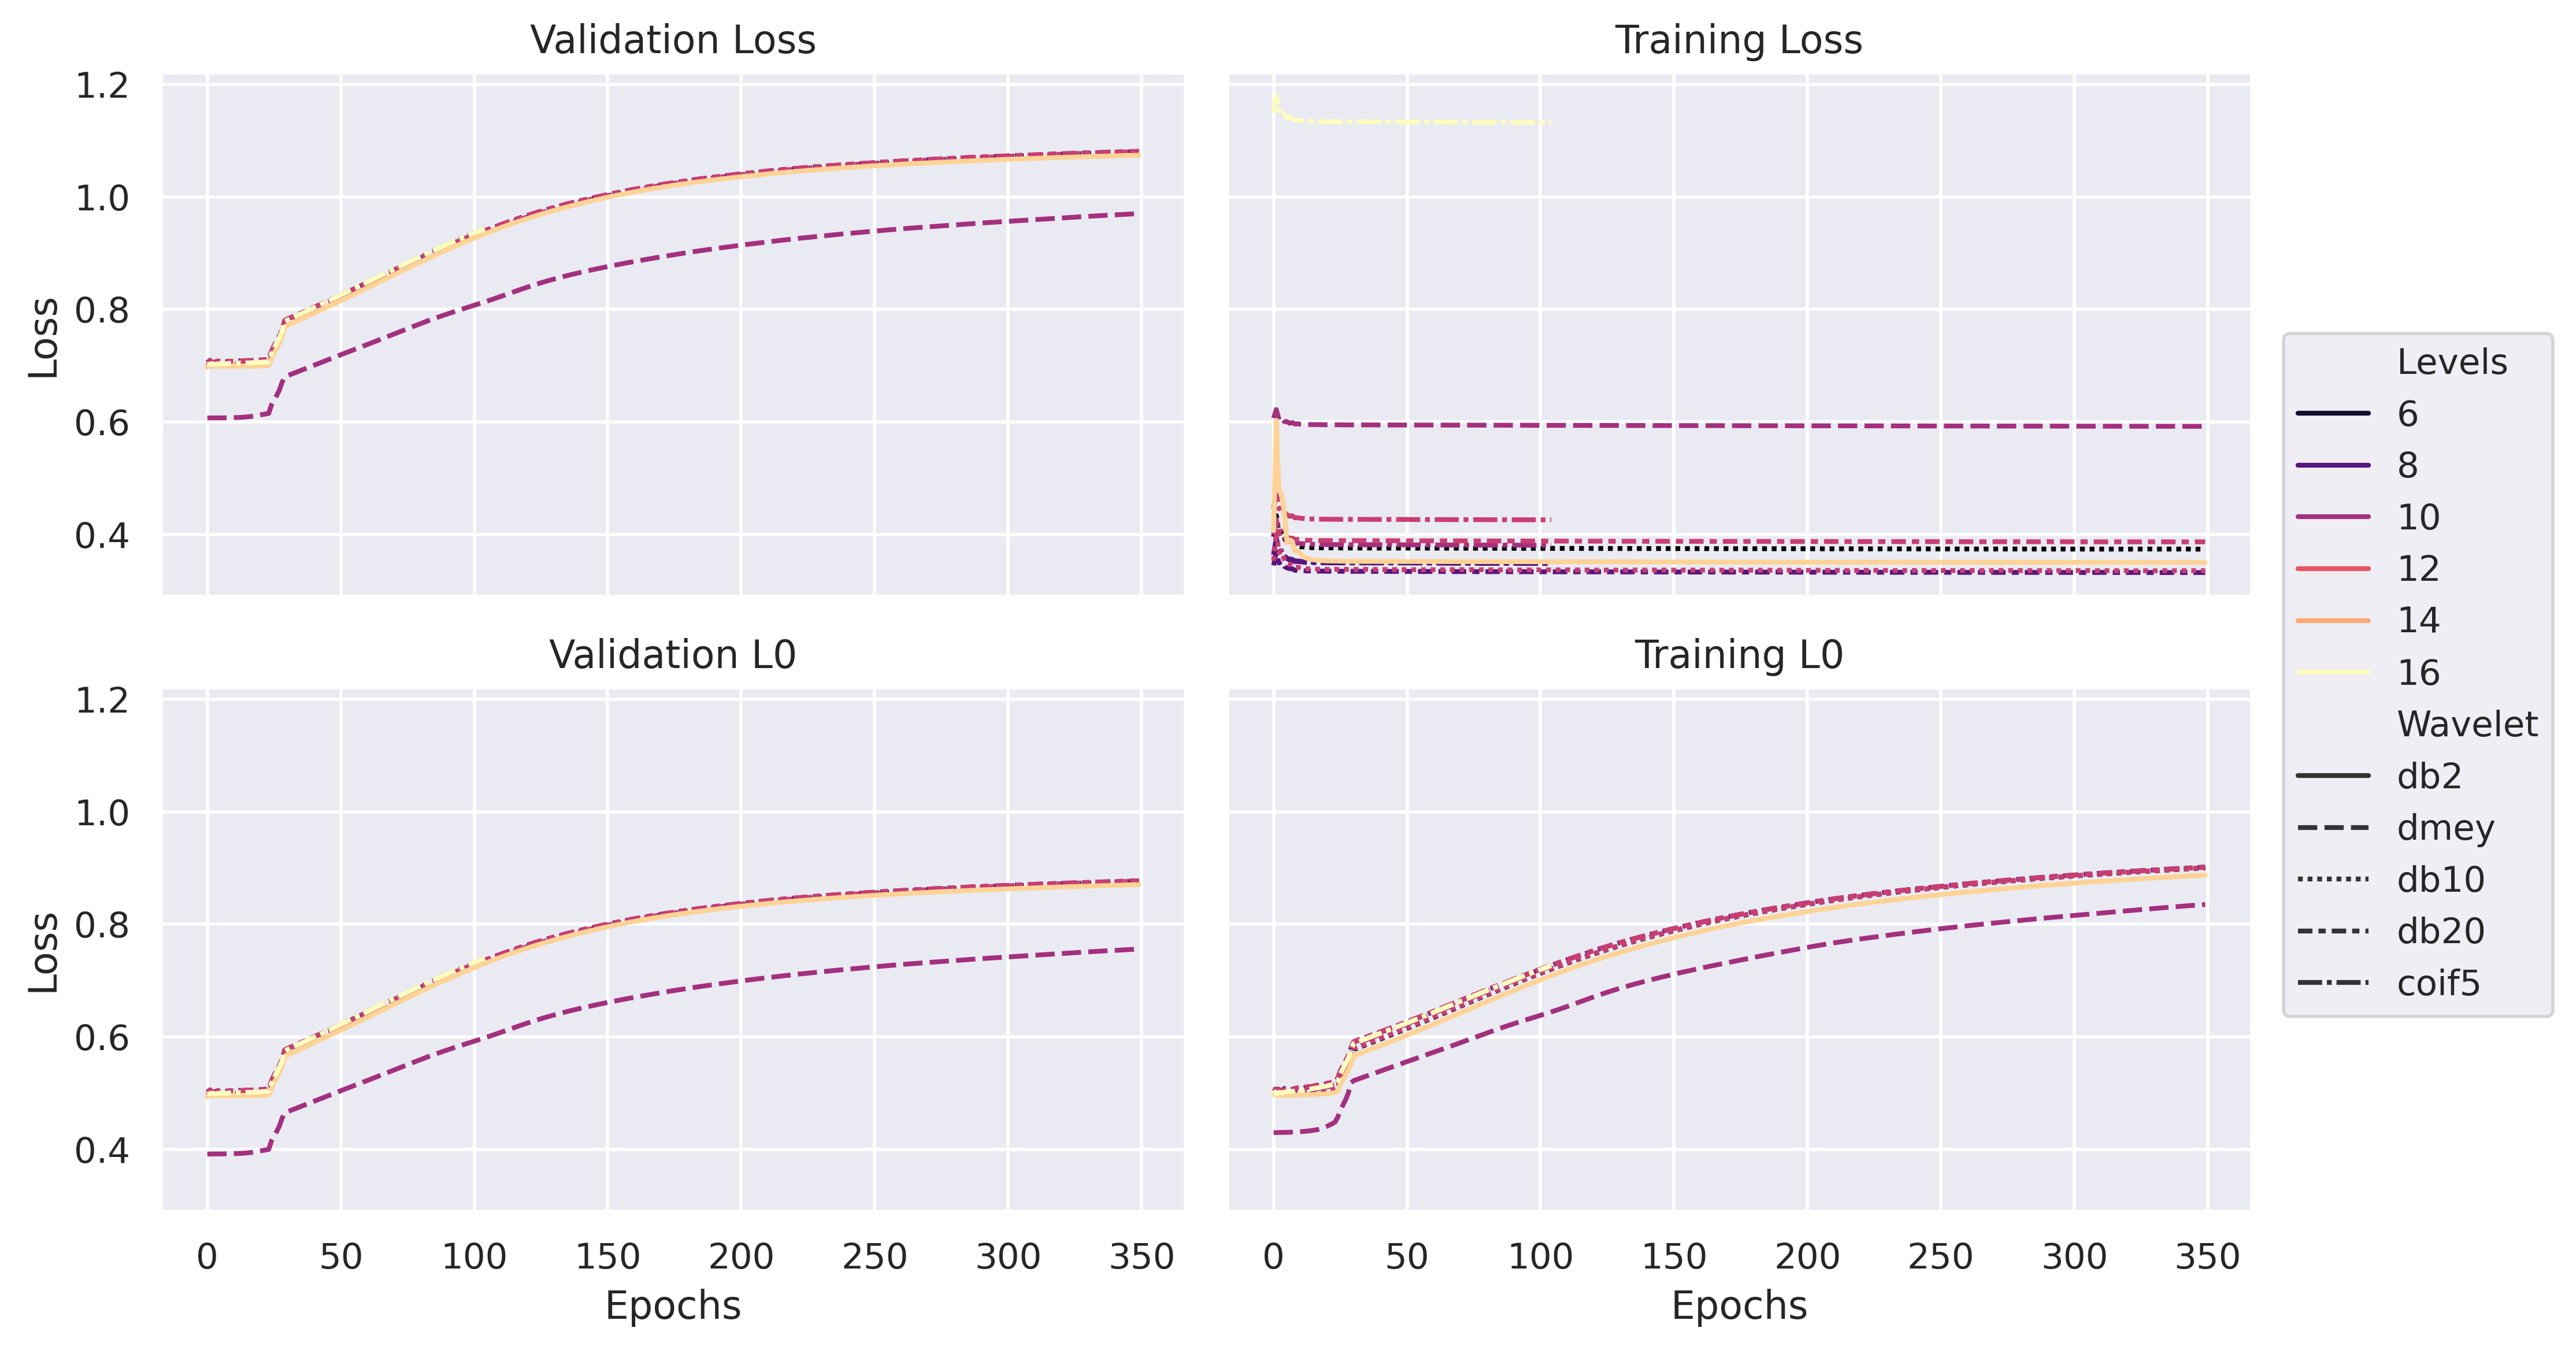

In [47]:
to_plot = {"Validation Loss": "total_loss", "Training Loss": "train_loss", "Validation L0": "l0_pnorm", "Training L0": "train_l0_avg"}
fig= plt.figure(figsize=(10, 6), dpi=400)
fig.set_tight_layout(True)
axs = fig.subplots(2, 2, sharey=True, sharex=True, )

sns.color_palette("husl", 8)
sns.set_theme()
legend = "auto"

for key, ax in zip(to_plot.keys(), axs.flat):
	a=sns.lineplot(data=superframe,x="epoch",  y=to_plot[key], hue="levels", style="starting_wav", ax=ax, legend=legend, palette="magma")
	#a.set_ylim((0, 1.25))
	a.set_title(key)
	a.set_ylabel("Loss")
	a.set_xlabel("Epochs")
	if legend:
		ax.get_legend().remove()
		legend = False

	#sns.move_legend(a, "upper left", bbox_to_anchor=(1, 1))

leg=fig.legend(loc=7, bbox_to_anchor=(1.12, 0.5))

for t in leg.get_texts():
	if t.get_text() == "starting_wav":
		t.set_text("Wavelet")
	if t.get_text() == "levels":
		t.set_text("Levels")
#fig.suptitle("Convergence")
#fig.tight_layout()

#fig.savefig("convergence-plot.svg")


